# Episode 3 - Plotting and Tabular Data

## OVERVIEW
### Questions
- How do we make scatter plots in Matplotlib?
- How do we store data in a Pandas DataFrame?
### Objectives
- Select rows and columns from an Astropy Table.
- Use Matplotlib to make a scatter plot.
- Use Gala to transform coordinates.
- Make a Pandas DataFrame and use a Boolean Series to select rows.
- Save a DataFrame in an HDF5 file.
### OUTLINE
- We will read back the results from the previous lesson, which we saved in a FITS file.
- Then we will transform the coordinates and proper motion data from ICRS back to the coordinate frame of GD-1.
- We will put those results into a Pandas DataFrame.

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import block
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from astropy.coordinates import SkyCoord
from gala.coordinates import GD1Koposov10, reflex_correct
from astropy.table import Table

from astro_utils import formatting, geometry

In [3]:
# load data from episode 2
filename = 'gd1_results.fits'
polygon_results = Table.read(filename)

gd1_frame = GD1Koposov10()

## Selecting rows and columns

In [4]:
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
SOURCE_ID   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension       Column
      dec float64      deg                                                        Declination       Column
     pmra float64 mas / yr                         Proper motion in right ascension direction       Column
    pmdec float64 mas / yr                             Proper motion in declination direction       Column
 parallax float64      mas                                                           Parallax       Column


In [5]:
print(type(polygon_results['ra']))
polygon_results['ra']

<class 'astropy.table.column.Column'>


142.48301935991023
142.25452941346344
142.64528557468074
142.57739430926034
142.58913564478618
141.81762228999614
143.18339801317677
142.9347319464589
142.26769745823267
142.89551292869012
142.2780935768316


In [6]:
polygon_results.colnames

['SOURCE_ID', 'ra', 'dec', 'pmra', 'pmdec', 'parallax']

In [7]:
print(type(polygon_results[0]))
polygon_results[0]

<class 'astropy.table.row.Row'>


SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354


In [8]:
print(f'{polygon_results['ra'][0]}, {polygon_results[0]['ra']}')

142.48301935991023, 142.48301935991023


## Scatter Plot

Text(0, 0.5, 'dec (degree ICRS)')

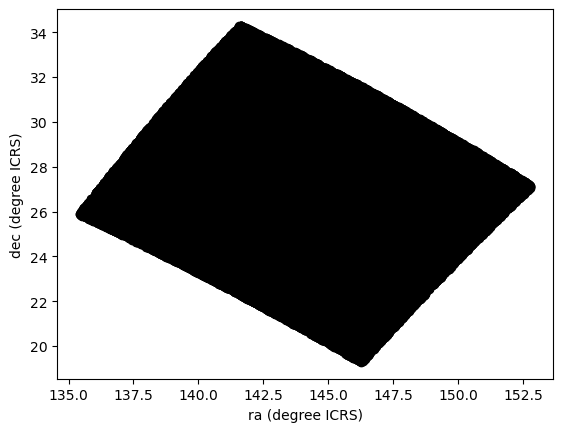

In [9]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y, 'ko')

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

### Exercise 3.1
In the call to `plt.plot`, use the keyword argument markersize to make the markers smaller.

Then add the keyword argument alpha to make the markers partly transparent.

Adjust these arguments until you think the figure shows the data most clearly.

Note: Once you have made these changes, you might notice that the figure shows stripes with lower density of stars. These stripes are caused by the way Gaia scans the sky, which you can read about here. The dataset we are using, Gaia Data Release 2, covers 22 months of observations; during this time, some parts of the sky were scanned more than others.

Text(0, 0.5, 'dec (degree ICRS)')

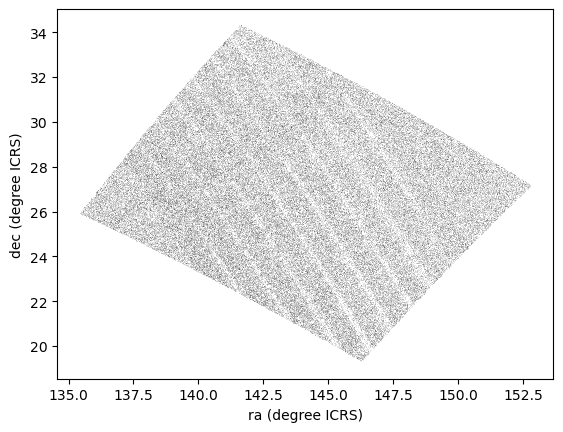

In [10]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y, 'k,', alpha=0.10)

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

## Transform back

In [11]:
skycoord = SkyCoord(ra=polygon_results['ra'], dec=polygon_results['dec'])

In [12]:
distance = 8 * u.kpc
radial_velocity= 0 * u.km/u.s

skycoord = SkyCoord(ra=polygon_results['ra'], 
                    dec=polygon_results['dec'],
                    pm_ra_cosdec=polygon_results['pmra'],
                    pm_dec=polygon_results['pmdec'], 
                    distance=distance, 
                    radial_velocity=radial_velocity)

In [13]:
transformed = skycoord.transform_to(gd1_frame)

Text(0, 0.5, 'phi2 (degree GD1)')

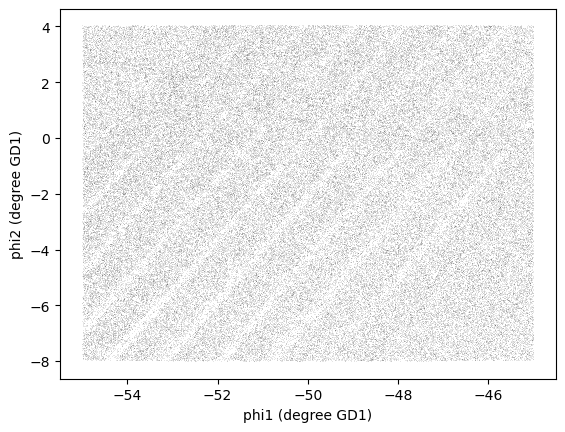

In [14]:
skycoord_gd1 = reflex_correct(transformed)

x = skycoord_gd1.phi1
y = skycoord_gd1.phi2
plt.plot(x, y, 'k,', alpha=0.10)

plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')

In [15]:
results_df = polygon_results.to_pandas()

## Or by using a custom function

In [16]:
results_df = formatting.make_dataframe(polygon_results)
results_table = Table.from_pandas(results_df)

In [17]:
filename = 'gd1_data.hdf'

results_df.to_hdf(filename, 'results_df', mode='w')

## Summary
In this episode, we re-loaded the Gaia data we saved from a previous query.

We transformed the coordinates and proper motion from ICRS to a frame aligned with the orbit of GD-1, stored the results in a Pandas DataFrame, and visualized them.

We combined all of these steps into a single function that we can reuse in the future to go straight from the output of a query with object coordinates in the ICRS reference frame directly to a Pandas DataFrame that includes object coordinates in the GD-1 reference frame.

We saved our results to an HDF5 file which we can use to restart the analysis from this stage or verify our results at some future time.